### 1. Load Libaries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from datetime import datetime
import plotly.express as px
import squarify

### 2. Load data and basic stats

* Products file have 167 rows (167 products), 4 columns
* Transaction has 48765 rows, 4 columns

In [4]:
products_df = pd.read_csv('Products_with_Categories.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [5]:
products_df.head()

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


In [6]:
products_df.describe()

,productId,price
count,167.00000,167.000000
mean,84.00000,6.040180
std,48.35287,4.949217
min,1.00000,0.300000
25%,42.50000,2.500000
50%,84.00000,4.900000
75%,125.50000,8.500000
max,167.00000,28.500000


In [7]:
products_df.groupby('Category')['price'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Pet Care,3.0,9.866667,3.590729,5.8,8.500,11.200,11.9000,12.60
Personal Care,8.0,9.818750,7.209812,2.5,4.900,9.850,10.8125,25.50
Beverages,20.0,8.020000,7.588745,0.5,1.650,6.850,12.2750,28.50
Fresh Food,27.0,7.005556,4.588077,0.8,3.050,7.200,9.0000,19.50
Household & Hygiene,26.0,6.927308,4.950886,2.2,3.575,5.600,7.9500,21.80
Dairy,17.0,5.402353,2.937021,1.8,3.200,5.200,6.4000,12.14
Specialty & Seasonal,8.0,5.212500,3.180044,0.5,2.850,5.650,7.2500,9.50
Bakery & Sweets,19.0,5.036842,4.674886,0.3,1.800,3.600,6.3000,18.80
Snacks,7.0,4.157143,4.099942,0.5,1.000,4.500,4.9000,12.30


In [8]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [9]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [10]:
products_df.groupby('Category')['price'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Pet Care,3.0,9.866667,3.590729,5.8,8.500,11.200,11.9000,12.60
Personal Care,8.0,9.818750,7.209812,2.5,4.900,9.850,10.8125,25.50
Beverages,20.0,8.020000,7.588745,0.5,1.650,6.850,12.2750,28.50
Fresh Food,27.0,7.005556,4.588077,0.8,3.050,7.200,9.0000,19.50
Household & Hygiene,26.0,6.927308,4.950886,2.2,3.575,5.600,7.9500,21.80
Dairy,17.0,5.402353,2.937021,1.8,3.200,5.200,6.4000,12.14
Specialty & Seasonal,8.0,5.212500,3.180044,0.5,2.850,5.650,7.2500,9.50
Bakery & Sweets,19.0,5.036842,4.674886,0.3,1.800,3.600,6.3000,18.80
Snacks,7.0,4.157143,4.099942,0.5,1.000,4.500,4.9000,12.30


### 3. Data preprocessing

- Merge products_df and transactions_df 
- Change Date column type to datetime
- Check null and duplicated values
- Add column: total_price = items x price

##### 3.1. Merge products_df and transactions_df

In [11]:
data = transactions_df.merge(products_df, on='productId', how='left')

In [12]:
data.head(5)

,Member_number,Date,productId,items,productName,price,Category
0,1808,21-07-2015,1,3,tropical fruit,7.8,Fresh Food
1,2552,05-01-2015,2,1,whole milk,1.8,Dairy
2,2300,19-09-2015,3,3,pip fruit,3.0,Fresh Food
3,1187,12-12-2015,4,3,other vegetables,0.8,Fresh Food
4,3037,01-02-2015,2,1,whole milk,1.8,Dairy


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Member_number  38765 non-null  int64  
 1   Date           38765 non-null  object 
 2   productId      38765 non-null  int64  
 3   items          38765 non-null  int64  
 4   productName    38765 non-null  object 
 5   price          38765 non-null  float64
 6   Category       38765 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


##### 3.2. Change datatime column

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

/var/folders/nq/2kwnsz3s0_n7jq2trb91l5_40000gn/T/ipykernel_55644/1453708669.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [15]:
data.head(5)

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Member_number  38765 non-null  int64         
 1   Date           38765 non-null  datetime64[ns]
 2   productId      38765 non-null  int64         
 3   items          38765 non-null  int64         
 4   productName    38765 non-null  object        
 5   price          38765 non-null  float64       
 6   Category       38765 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 2.1+ MB


In [17]:
print(f"There has {data.isnull().sum()} null values")

There has Member_number    0
Date             0
productId        0
items            0
productName      0
price            0
Category         0
dtype: int64 null values


In [18]:
print(f"There has {data.duplicated().sum()} duplicated values")

There has 244 duplicated values


##### 3.3. Add column total_income

In [19]:
data['total_income'] = data['price'] * data['items']

In [20]:
data.head()

,Member_number,Date,productId,items,productName,price,Category,total_income
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,1.8
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,9.0
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food,2.4
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy,1.8


#### 4. RFM calculation

In [21]:
data["Year-Month"] = data["Date"].dt.to_period("M").astype(str)
data.head(3)

,Member_number,Date,productId,items,productName,price,Category,total_income,Year-Month
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4,2015-07
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,1.8,2015-01
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,9.0,2015-09


In [22]:
max_date = data['Date'].max().date()

 # after group has to take the max date to calculate
Recency = lambda x: (max_date - x.max().date()).days  

# Frequency and Monetory functions
Frequency = lambda x: len(x)  
Monetory = lambda x: round(sum(x), 2)  

df_RFM = data.groupby('Member_number').agg(
    {
        'Date': Recency,        
        'items': Frequency,      
        'total_income': Monetory 
    }
)

# Check the result
print(df_RFM)


               Date  items  total_income
Member_number                           
1000             35     13         53.80
1001            242     12        100.00
1002            122      8         70.30
1003            323      8         60.65
1004             28     21        204.96
...             ...    ...           ...
4996             36     10         28.50
4997              3      6         93.00
4998             77      2         33.00
4999              4     16        164.86
5000            323      7         21.80

[3898 rows x 3 columns]


In [23]:
df_RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,3898.0,187.701385,159.912688,0.0,57.00,141.0,280.000,727.00
items,3898.0,9.944844,5.310796,2.0,6.00,9.0,13.000,36.00
total_income,3898.0,85.212835,55.620089,1.3,43.81,74.9,115.295,375.31


In [24]:
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending=False)

In [25]:
df_RFM.reset_index().to_csv('df_RFM.csv', index=False)

In [26]:
print("Transactions timeframe from {} to {}".format(data['Date'].min(), data['Date'].max()))
print('There has {} unique customer'.format(len(data.Member_number.unique())))
print('There has {} category'.format(len(data.Category.unique())))
print('There has {} products'.format(len(data.productName.unique())))

Transactions timeframe from 2014-01-01 00:00:00 to 2015-12-30 00:00:00
There has 3898 unique customer
There has 11 category
There has 167 products


In [27]:
def count_outliers(df):
    total_outliers = {}

    for col in df.columns:
        mean_val = df[col].mean()
        std_val = df[col].std()
        lower_bound = mean_val - 1.5 * std_val
        upper_bound = mean_val + 1.5 * std_val
        outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

        total_outliers[col] = outliers_count
    return total_outliers

In [28]:
outliers = count_outliers(df_RFM)
outliers

{'Recency': 376, 'Frequency': 340, 'Monetary': 322}

#### 5. Data visualization

##### 5.1. Original files

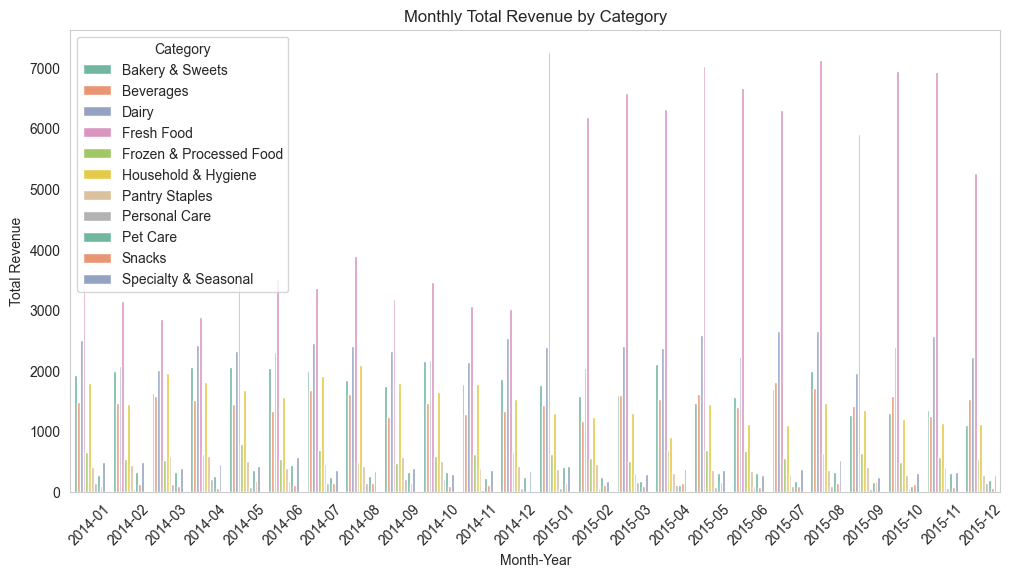

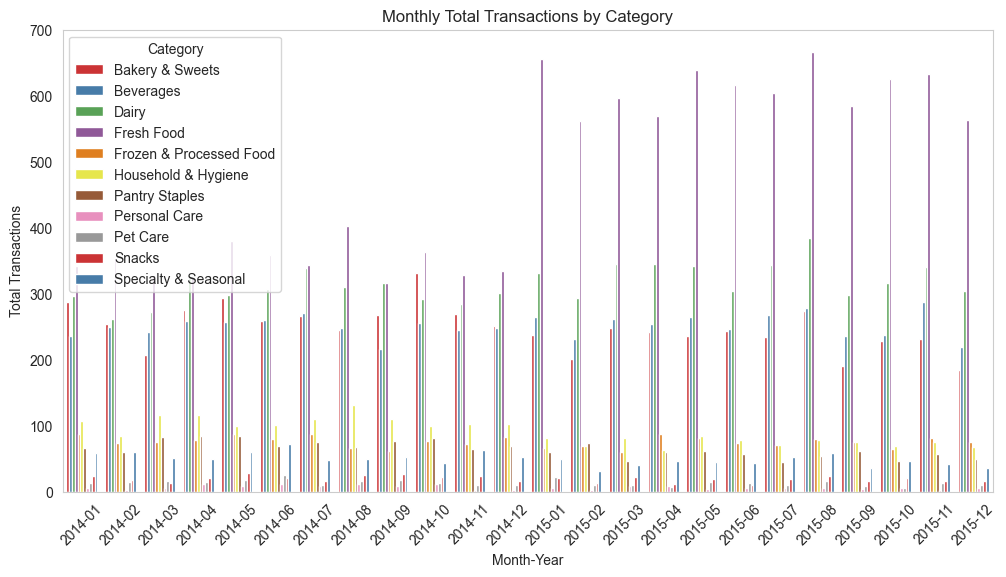

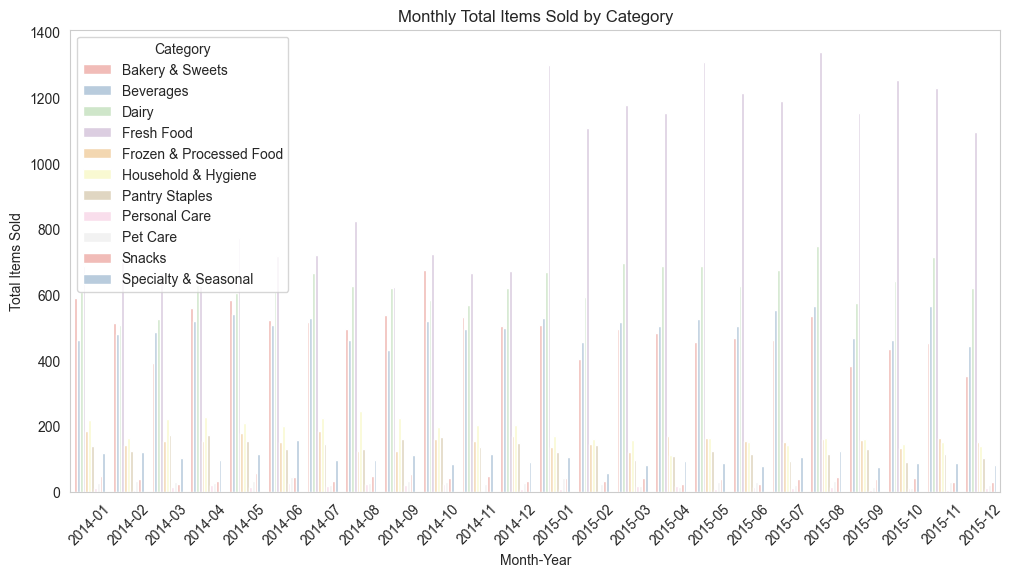

In [29]:
data["Date"] = pd.to_datetime(data["Date"])

data["Year-Month"] = data["Date"].dt.to_period("M").astype(str)  


category_stats = data.groupby(["Year-Month", "Category"]).agg(
    Total_Revenue=("total_income", "sum"),
    Total_Transactions=("Member_number", "count"),  
    Total_Items_Sold=("items", "sum")
).reset_index()

# Set seaborn style
sns.set_style("whitegrid")

# Plot 1: Revenue per Category over Time
plt.figure(figsize=(12, 6))
sns.barplot(x="Year-Month", y="Total_Revenue", hue="Category", data=category_stats, palette="Set2")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.title("Monthly Total Revenue by Category")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(False)
plt.show()

# Plot 2: Transactions per Category over Time
plt.figure(figsize=(12, 6))
sns.barplot(x="Year-Month", y="Total_Transactions", hue="Category", data=category_stats, palette="Set1")
plt.xlabel("Month-Year")
plt.ylabel("Total Transactions")
plt.title("Monthly Total Transactions by Category")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(False)
plt.show()

# Plot 3: Items Sold per Category over Time
plt.figure(figsize=(12, 6))
sns.barplot(x="Year-Month", y="Total_Items_Sold", hue="Category", data=category_stats, palette="Pastel1")
plt.xlabel("Month-Year")
plt.ylabel("Total Items Sold")
plt.title("Monthly Total Items Sold by Category")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(False)
plt.show()

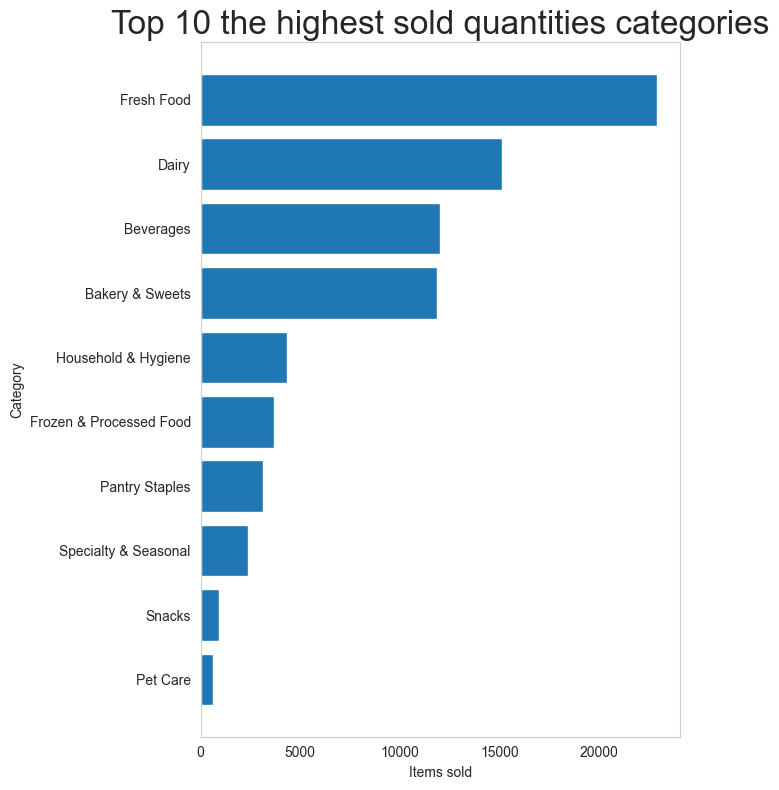

In [30]:
top_categories = (data.groupby('Category')['items'].sum().sort_values(ascending=False).head(10).reset_index()) 


plt.figure(figsize=(7, 8))
plt.barh(top_categories['Category'], top_categories['items'])
plt.xlabel('Items sold')
plt.ylabel('Category')
plt.title('Top 10 the highest sold quantities categories', fontsize =24)
plt.grid(False)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

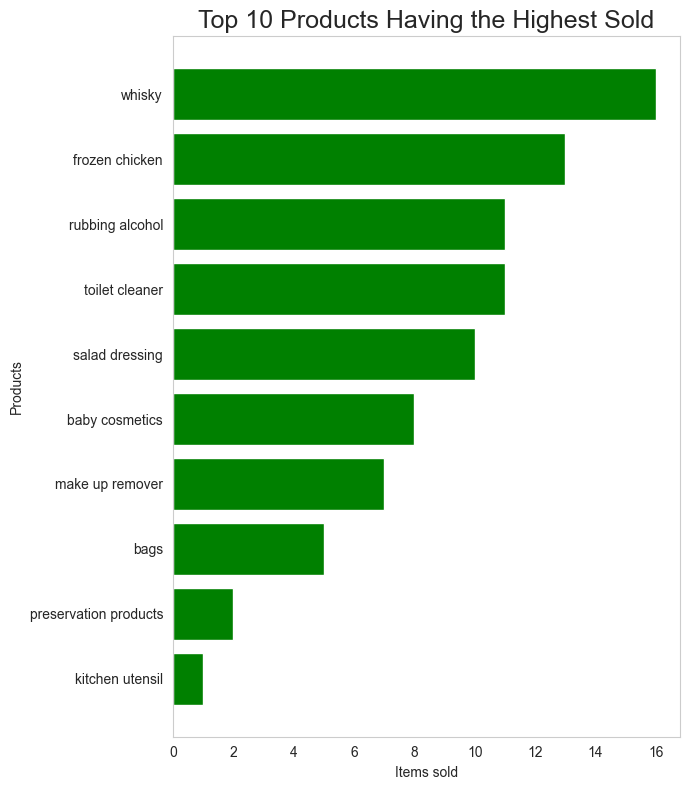

In [31]:
top_products = data.groupby('productName')['items'].sum().sort_values(ascending=True).head(10).reset_index()

plt.figure(figsize=(7, 8))
plt.barh(top_products['productName'], top_products['items'], color='green')
plt.xlabel('Items sold')
plt.ylabel('Products')
plt.title('Top 10 Products Having the Highest Sold', fontsize=18)  
plt.tight_layout()
plt.grid(False)
plt.show()

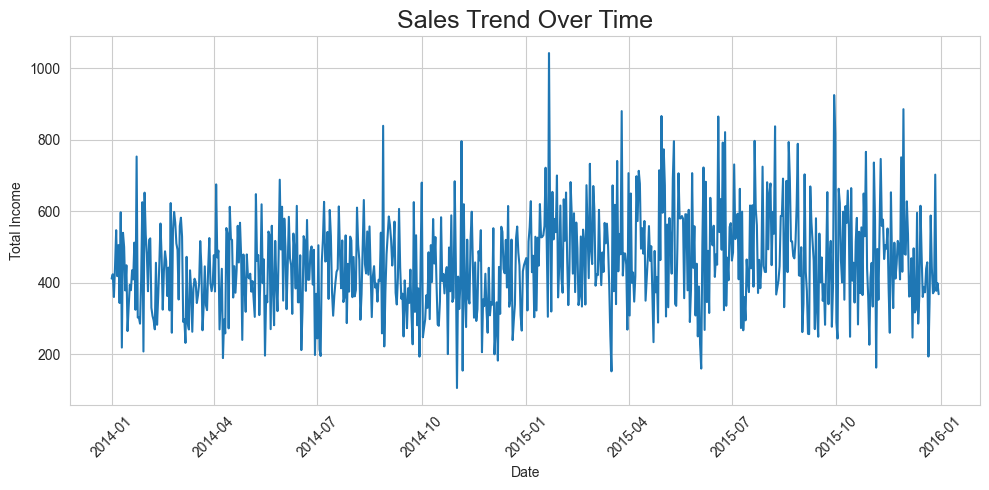

In [32]:
sales_trend = data.copy()
daily_sales = sales_trend.groupby('Date')['total_income'].sum()

plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Sales Trend Over Time', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Total Income')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

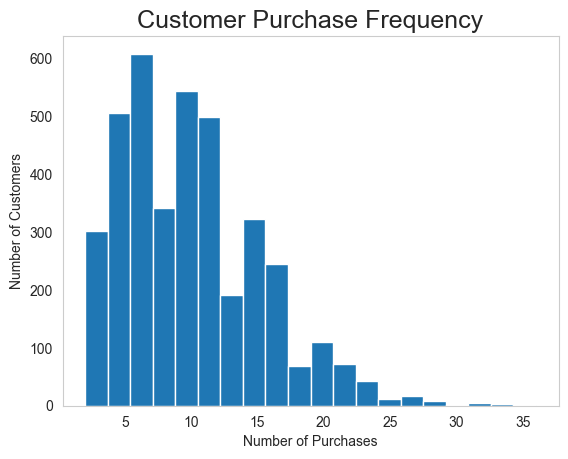

In [33]:
customer_orders = transactions_df['Member_number'].value_counts()
fig, ax = plt.subplots()
ax.hist(customer_orders, bins=20)
ax.set_title("Customer Purchase Frequency", fontsize=18)
ax.set_xlabel("Number of Purchases")
ax.set_ylabel("Number of Customers")
plt.grid(False)
plt.show()

In [34]:
data.columns

Index(['Member_number', 'Date', 'productId', 'items', 'productName', 'price',
       'Category', 'total_income', 'Year-Month'],
      dtype='object')

In [35]:
# Sort products by price
sorted_products = products_df.sort_values(by='price')

# Get top 5 most expensive and cheapest products
top_expensive = sorted_products.tail(5)
top_cheap = sorted_products.head(5)

# Revenue and quantity sold for each
def get_product_revenue_summary(products_df, label):
    selected = data[data['productId'].isin(products_df['productId'])]
    summary = selected.groupby('productId').agg(
        productName=('productName', 'first'),
        category=('Category', 'first'),
        price=('price', 'first'),
        quantity_sold=('items', 'sum'),
        total_revenue=('total_income', 'sum')
    ).reset_index()
    summary['type'] = label
    return summary

expensive_summary = get_product_revenue_summary(top_expensive, 'Most Expensive')
cheap_summary = get_product_revenue_summary(top_cheap, 'Cheapest')

# Combine
compare_df = pd.concat([expensive_summary, cheap_summary])
compare_df.head(10)

,productId,productName,category,price,quantity_sold,total_revenue,type
0,106,prosecco,Beverages,20.1,37,743.7,Most Expensive
1,112,baby cosmetics,Personal Care,25.5,8,204.0,Most Expensive
2,114,napkins,Household & Hygiene,21.8,669,14584.2,Most Expensive
3,120,bags,Household & Hygiene,19.5,5,97.5,Most Expensive
4,139,whisky,Beverages,28.5,16,456.0,Most Expensive
0,17,bottled water,Beverages,0.5,1862,931.0,Cheapest
1,80,salty snack,Snacks,0.5,536,268.0,Cheapest
2,81,Instant food products,Frozen & Processed Food,0.6,118,70.8,Cheapest
3,83,white bread,Bakery & Sweets,0.3,710,213.0,Cheapest
4,100,chewing gum,Specialty & Seasonal,0.5,352,176.0,Cheapest


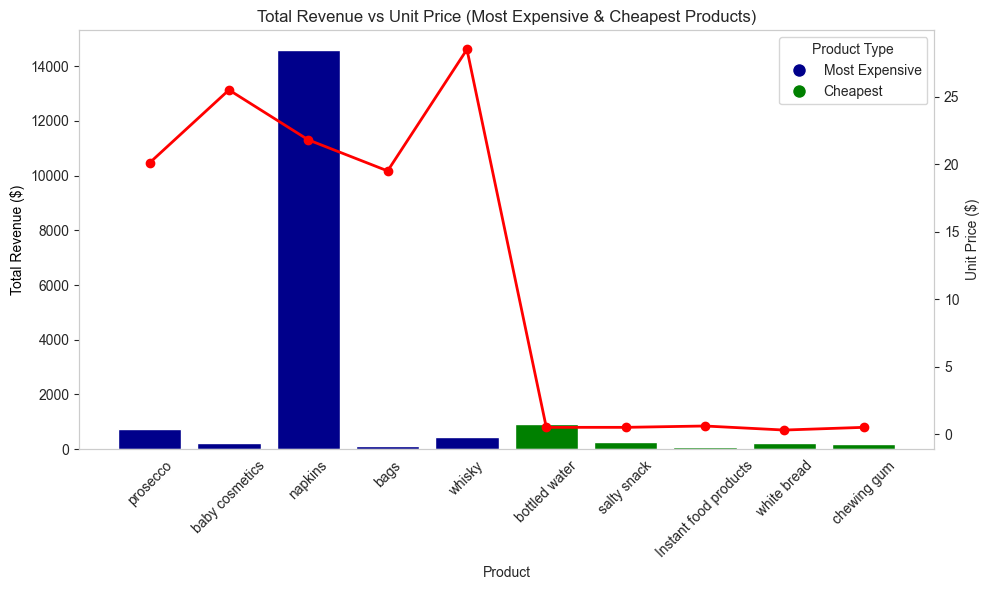

In [45]:
bar_colors = compare_df['type'].map({
    'Most Expensive': 'darkblue',
    'Cheapest': 'green'
})

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total revenue
bars = ax1.bar(compare_df['productName'], compare_df['total_revenue'],
               color=bar_colors, label='Total Revenue')
ax1.set_ylabel('Total Revenue ($)', color='black')
ax1.set_xlabel('Product')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(False)
# Line plot for unit price (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(compare_df['productName'], compare_df['price'],
         color='red', marker='o', linewidth=2, label='Unit Price')
ax2.set_ylabel('Unit Price ($)')
ax2.tick_params(axis='y')
ax2.grid(False)

ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkblue', markersize=10, label='Most Expensive'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cheapest')
], loc='upper right', title="Product Type")

# Title and layout
plt.title('Total Revenue vs Unit Price (Most Expensive & Cheapest Products)')
fig.tight_layout()
plt.show()



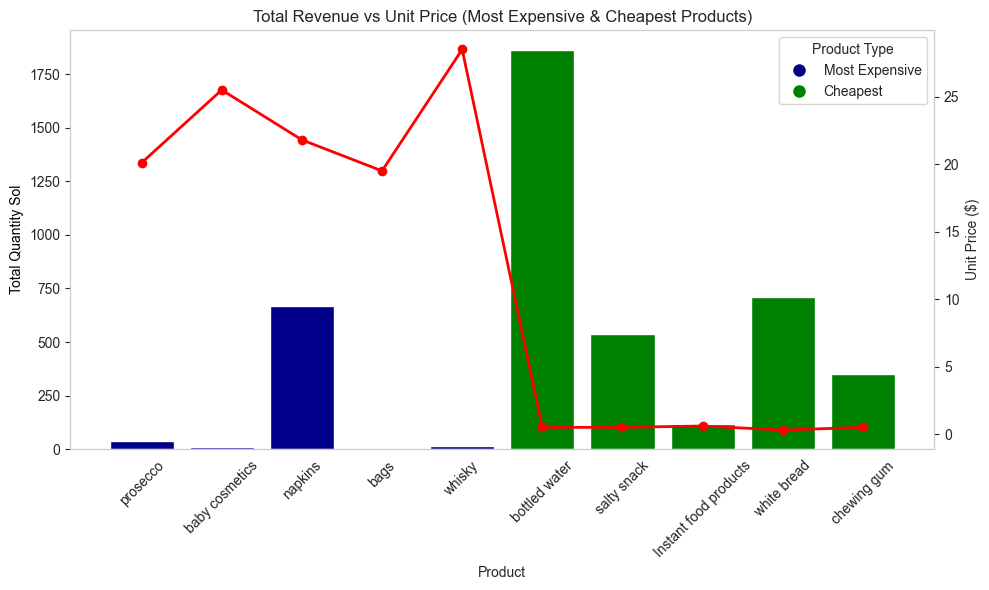

In [46]:
bar_colors = compare_df['type'].map({
    'Most Expensive': 'darkblue',
    'Cheapest': 'green'
})

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total revenue
bars = ax1.bar(compare_df['productName'], compare_df['quantity_sold'],
               color=bar_colors, label='Total Quantity')
ax1.set_ylabel('Total Quantity Sol', color='black')
ax1.set_xlabel('Product')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(False)
# Line plot for unit price (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(compare_df['productName'], compare_df['price'],
         color='red', marker='o', linewidth=2, label='Unit Price')
ax2.set_ylabel('Unit Price ($)')
ax2.tick_params(axis='y')
ax2.grid(False)

ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkblue', markersize=10, label='Most Expensive'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cheapest')
], loc='upper right', title="Product Type")
# Title and layout
plt.title('Total Revenue vs Unit Price (Most Expensive & Cheapest Products)')
fig.tight_layout()
plt.show()



##### 5.2. RFM data

Recency


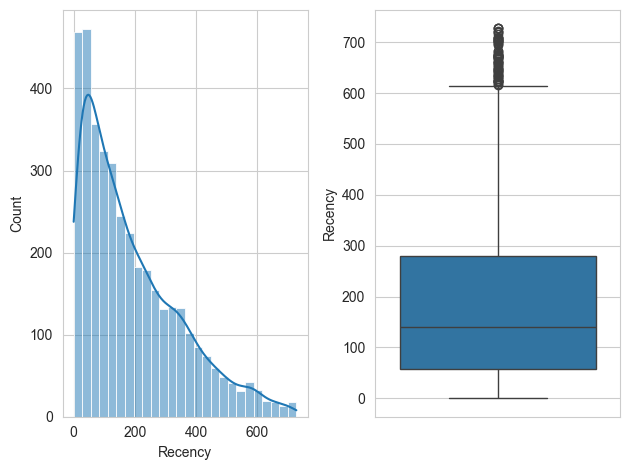

Frequency


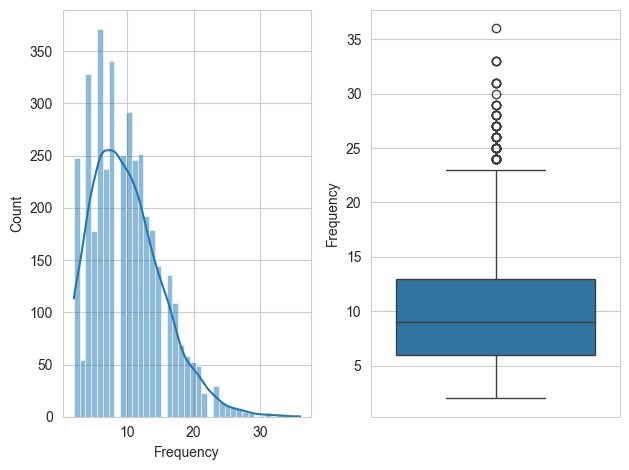

Monetary


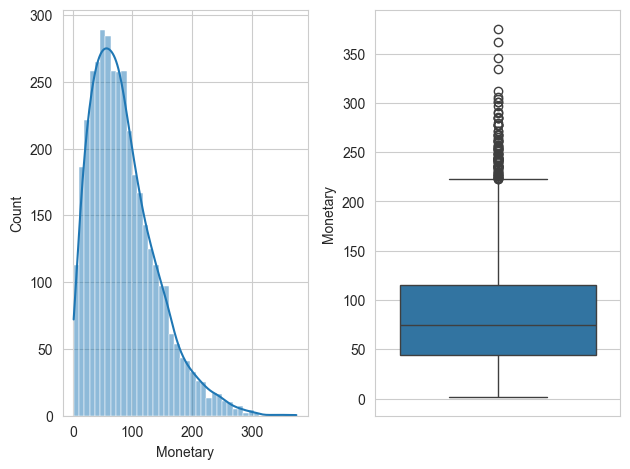

In [38]:
for col in df_RFM.columns:
    print(col)
    plt.subplot(1,2,1)
    sns.histplot(df_RFM[col], kde=True)

    plt.subplot(1,2,2)
    sns.boxplot(df_RFM[col])

    plt.tight_layout()
    plt.show()

##### Comments: 
We won't remove outliers because those values are important values in cluster, and there are a lot of outliers values, if we process them, data size will be reduced significantly

<Axes: >

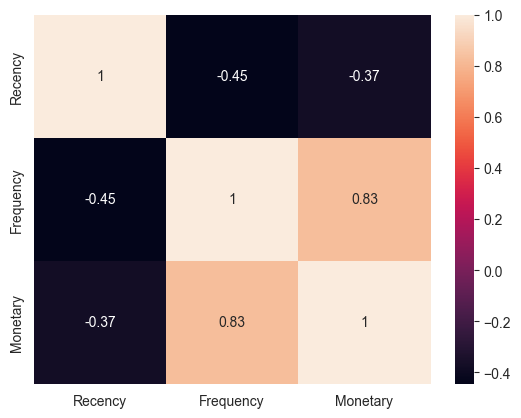

In [47]:
sns.heatmap(df_RFM.corr(), annot=True)

Monetary and Frequency have a close relationship; when frequency increases, monetary also increases.